**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

**CSV FILE IMPORT**

In [ ]:
from google.colab import files
Data = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving My_Data.csv to My_Data (2).csv


**READING CSV**

In [ ]:
data = pd.read_csv('My_Data.csv')

In [ ]:
data.head()


,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [ ]:
print("Csv dimension : ", data.shape)
print(data.describe())
print(data.info())

Csv dimension :  (4706, 6)
             Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000           0.036585
25%     161.000000  1085.250000           0.137271
50%     270.000000  1577.500000           0.199281
75%     608.750000  2273.000000           0.260572
max    1387.000000  5666.000000                inf
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int6

**Ques 1 - Can we define rules to classify job titles into different domains (e.g., Communication & PR, Data & IT) based on their characteristics such as tasks and AI impact?**

In [ ]:
# Remove '%' symbol from 'AI Impact' column and convert to integer
data['AI Impact'] = data['AI Impact'].str.replace('%', '').astype(int)

# Convert 'Tasks' column to integer
data['Tasks'] = data['Tasks'].astype(int)

# Define rules for classifying job titles into domains based on tasks and AI impact
def classify_domain(row):
    job_title = row['Job titiles']
    tasks_count = row['Tasks']
    ai_impact_percentage = row['AI Impact']
    if 'Data' in job_title or 'IT' in job_title:
        return 'Data & IT'
    elif 'Communications' in job_title or 'PR' in job_title:
        return 'Communication & PR'
    else:
        # Default rule based on AI impact and tasks count
        if ai_impact_percentage > 50 and tasks_count > 200:
            return 'Other'
        else:
            return 'Unknown'

# Apply classification to the DataFrame
data['Predicted_Domain'] = data.apply(classify_domain, axis=1)

# Display the classified data
print(data[['Job titiles', 'AI Impact', 'Tasks', 'Domain', 'Predicted_Domain']])


                 Job titiles  AI Impact  Tasks                     Domain  \
0     Communications Manager         98    365         Communication & PR   
1             Data Collector         95    299                  Data & IT   
2                 Data Entry         95    325  Administrative & Clerical   
3                 Mail Clerk         95    193      Leadership & Strategy   
4         Compliance Officer         92    194       Medical & Healthcare   
...                      ...        ...    ...                        ...   
4701                  Singer          5    686                  Data & IT   
4702                 Airport          5    556  Administrative & Clerical   
4703                Director          5   1316      Leadership & Strategy   
4704                   Nurse          5    710       Medical & Healthcare   
4705              Technician          5    825   Supply Chain & Logistics   

        Predicted_Domain  
0     Communication & PR  
1              Data &

**Ques 2 - What criteria can be used to create rules that assign job titles to the correct domain?**

In [ ]:
# Define rules for classifying job titles into domains based on criteria
def classify_domain(row):
    job_title = row['Job titiles']
    tasks_count = row['Tasks']
    ai_impact_percentage = row['AI Impact']
    # Criteria based on job title keywords
    if 'Data' in job_title or 'Analyst' in job_title:
        return 'Data & IT'
    elif 'Manager' in job_title or 'Coordinator' in job_title:
        return 'Management'

    # Criteria based on tasks count and AI impact percentage
    if ai_impact_percentage >= 80 and tasks_count >= 300:
        return 'High-Tech'
    elif ai_impact_percentage < 20:
        return 'Traditional'

    # Default rule
    return 'Other'

# Apply classification to the DataFrame
data['Predicted_Domain'] = data.apply(classify_domain, axis=1)

# Display the classified data
print(data[['Job titiles', 'AI Impact', 'Tasks', 'Domain', 'Predicted_Domain']])

                 Job titiles  AI Impact  Tasks                     Domain  \
0     Communications Manager         98    365         Communication & PR   
1             Data Collector         95    299                  Data & IT   
2                 Data Entry         95    325  Administrative & Clerical   
3                 Mail Clerk         95    193      Leadership & Strategy   
4         Compliance Officer         92    194       Medical & Healthcare   
...                      ...        ...    ...                        ...   
4701                  Singer          5    686                  Data & IT   
4702                 Airport          5    556  Administrative & Clerical   
4703                Director          5   1316      Leadership & Strategy   
4704                   Nurse          5    710       Medical & Healthcare   
4705              Technician          5    825   Supply Chain & Logistics   

     Predicted_Domain  
0          Management  
1           Data & IT  
2  

**Ques 3 - Can we predict the domain (industry) of a job title based on its characteristics (tasks, AI impact, etc.)?**

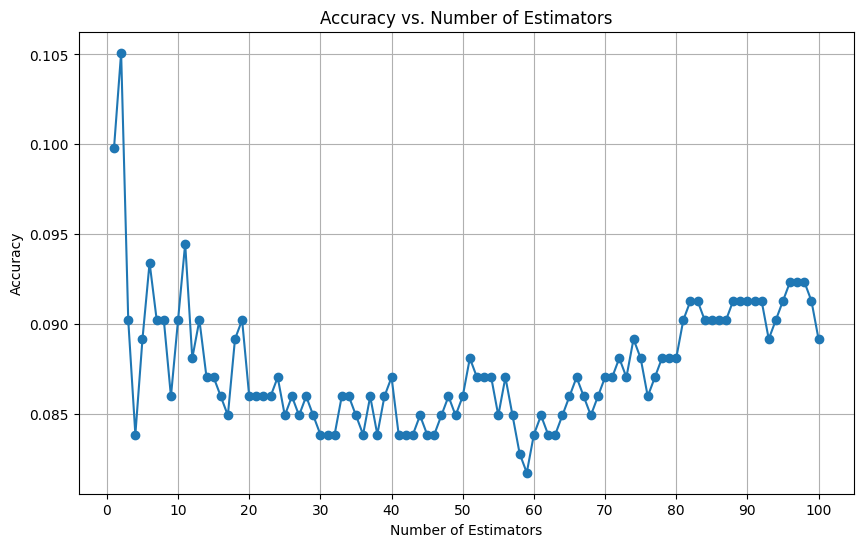

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data[['Tasks', 'AI Impact']]  # Features
y = data['Domain']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for n_estimators
estimators_range = range(1, 101)
accuracies = []

# Iterate over different values of n_estimators
for n_estimators in estimators_range:
    # Initialize the Random Forest Classifier with n_estimators
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict the domain for test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, accuracies, marker='o')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.show()

**QUES 4.Given the AI_Workload_Ratio, can we classify job titles into high, medium, and low AI workload categories?**

In [ ]:
# Define function to classify workload categories
def classify_workload_category(ai_workload_ratio):
    if ai_workload_ratio < 0.33:
        return "Low"
    elif ai_workload_ratio < 0.66:
        return "Medium"
    else:
        return "High"

# Apply classification to the DataFrame
data['Workload_Category'] = data['AI_Workload_Ratio'].apply(classify_workload_category)

# Display the classified data
print(data[['Job titiles', 'AI_Workload_Ratio', 'Workload_Category']])

                 Job titiles  AI_Workload_Ratio Workload_Category
0     Communications Manager           0.143362               Low
1             Data Collector           0.139199               Low
2                 Data Entry           0.142669               Low
3                 Mail Clerk           0.141288               Low
4         Compliance Officer           0.141709               Low
...                      ...                ...               ...
4701                  Singer           0.245175               Low
4702                 Airport           0.252040               Low
4703                Director           0.280298               Low
4704                   Nurse           0.273709               Low
4705              Technician           0.253378               Low

[4706 rows x 3 columns]


**QUES 5- Can we cluster job titles based on their AI impact and tasks to identify groups with similar characteristics?**

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
X = data[['AI Impact', 'Tasks']]

# Initialize KMeans clustering with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Add cluster labels to the DataFrame
data['Cluster_Labels'] = kmeans.labels_

# Display the clustered data
print(data[['Job titiles', 'AI Impact', 'Tasks', 'Cluster_Labels']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 Job titiles  AI Impact  Tasks  Cluster_Labels
0     Communications Manager         98    365               2
1             Data Collector         95    299               0
2                 Data Entry         95    325               0
3                 Mail Clerk         95    193               0
4         Compliance Officer         92    194               0
...                      ...        ...    ...             ...
4701                  Singer          5    686               2
4702                 Airport          5    556               2
4703                Director          5   1316               1
4704                   Nurse          5    710               2
4705              Technician          5    825               1

[4706 rows x 4 columns]


**Ques 6- Are there distinct clusters of job titles based on the count of AI models associated with them?**

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
X = data[['AI models']]

# Initialize KMeans clustering with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Add cluster labels to the DataFrame
data['AI_Models_Cluster_Labels'] = kmeans.labels_

# Display the clustered data
print(data[['Job titiles', 'AI models', 'AI_Models_Cluster_Labels']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 Job titiles  AI models  AI_Models_Cluster_Labels
0     Communications Manager       2546                         0
1             Data Collector       2148                         0
2                 Data Entry       2278                         0
3                 Mail Clerk       1366                         2
4         Compliance Officer       1369                         2
...                      ...        ...                       ...
4701                  Singer       2798                         0
4702                 Airport       2206                         0
4703                Director       4695                         1
4704                   Nurse       2594                         0
4705              Technician       3256                         1

[4706 rows x 3 columns]


**Ques 7- Are there any interesting associations between job titles and their respective domains?**

Domain                  Administrative & Clerical  Communication & PR  \
Job titiles                                                             
.Net Developer                                  0                   0   
3D Animator                                     0                   0   
3D Artist                                       0                   0   
3D Designer                                     0                   0   
3D Modeler                                      0                   0   
...                                           ...                 ...   
Youth Program Director                          0                   0   
Youth Specialist                                0                   1   
Youth Worker                                    0                   1   
Zamboni Driver                                  0                   0   
Zoologist                                       0                   0   

Domain                  Construction  Data & IT  H

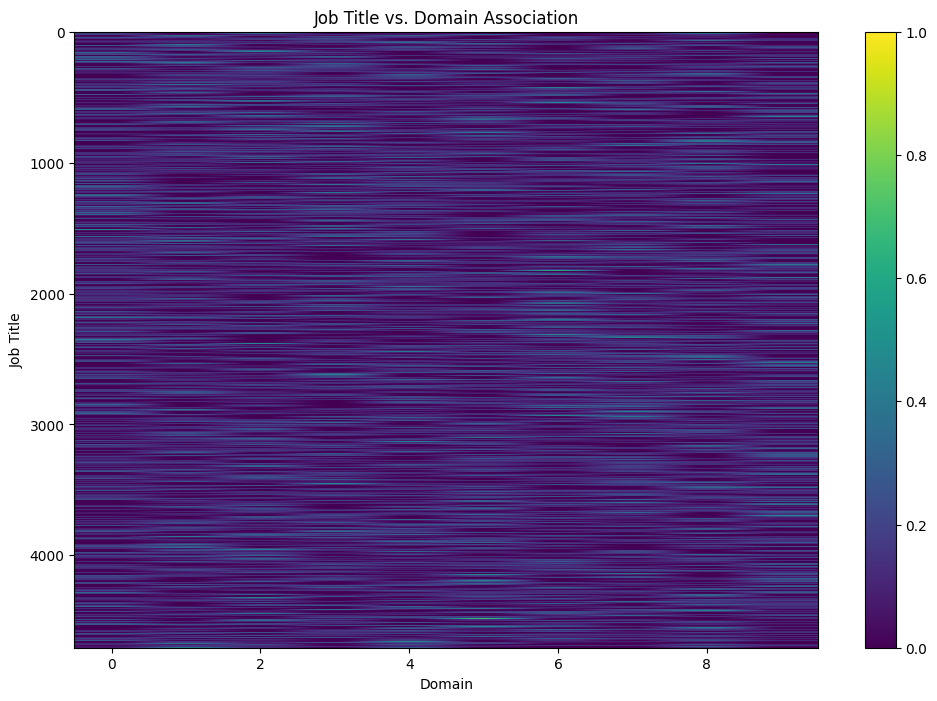

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Use crosstab to find associations between job titles and domains
job_title_domain_association = pd.crosstab(data['Job titiles'], data['Domain'])

# Display the association table
print(job_title_domain_association)

# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
plt.imshow(job_title_domain_association, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('Domain')
plt.ylabel('Job Title')
plt.title('Job Title vs. Domain Association')
plt.show()

**Ques 8-Can we find rules that indicate a high AI impact based on the tasks associated with a job title?**

In [ ]:
# Define function to identify high AI impact based on tasks
def identify_high_ai_impact(tasks_count):
    if tasks_count > 300:
        return "High AI Impact"
    else:
        return "Low/Medium AI Impact"

# Apply classification to the DataFrame
data['AI_Impact_Rule'] = data['Tasks'].apply(identify_high_ai_impact)

# Display the classified data
print(data[['Job titiles', 'Tasks', 'AI_Impact_Rule']])

                 Job titiles  Tasks        AI_Impact_Rule
0     Communications Manager    365        High AI Impact
1             Data Collector    299  Low/Medium AI Impact
2                 Data Entry    325        High AI Impact
3                 Mail Clerk    193  Low/Medium AI Impact
4         Compliance Officer    194  Low/Medium AI Impact
...                      ...    ...                   ...
4701                  Singer    686        High AI Impact
4702                 Airport    556        High AI Impact
4703                Director   1316        High AI Impact
4704                   Nurse    710        High AI Impact
4705              Technician    825        High AI Impact

[4706 rows x 3 columns]


**Ques 9 - Are there any job titles that have an unusually high or low AI impact compared to the tasks associated with them??**

In [ ]:
# Calculate z-score for AI impact
data['AI_Impact_Z_Score'] = (data['AI Impact'] - data['AI Impact'].mean()) / data['AI Impact'].std()

# Detect anomalies based on z-score
anomalies = data[(data['AI_Impact_Z_Score'] > 2) | (data['AI_Impact_Z_Score'] < -2)]

# Display the anomalies
print(anomalies[['Job titiles', 'AI Impact', 'Tasks', 'AI_Impact_Z_Score']])

                  Job titiles  AI Impact  Tasks  AI_Impact_Z_Score
0      Communications Manager         98    365           3.718317
1              Data Collector         95    299           3.553516
2                  Data Entry         95    325           3.553516
3                  Mail Clerk         95    193           3.553516
4          Compliance Officer         92    194           3.388715
..                        ...        ...    ...                ...
215          Business Manager         68    164           2.070308
216           Inpatient Coder         68    117           2.070308
217  Assistant Branch Manager         67    130           2.015374
218      Front Desk Attendant         67    126           2.015374
219        Front Office Clerk         67    129           2.015374

[220 rows x 4 columns]


**Ques 10 - Can we detect anomalies in the AI_Workload_Ratio that might indicate errors in the data or unusual workload distributions?**

In [ ]:
# Calculate z-score for AI workload ratio
data['AI_Workload_Z_Score'] = (data['AI_Workload_Ratio'] - data['AI_Workload_Ratio'].mean()) / data['AI_Workload_Ratio'].std()

# Detect anomalies based on z-score
anomalies = data[(data['AI_Workload_Z_Score'] > 2) | (data['AI_Workload_Z_Score'] < -2)]

# Display the anomalies
print(anomalies[['Job titiles', 'AI_Workload_Ratio']])

Empty DataFrame
Columns: [Job titiles, AI_Workload_Ratio]
Index: []


**Ques 11 - Which features (AI impact, tasks, AI models, etc.) are most important in determining the domain of a job title?**

In [ ]:
# Select features and target variable
X = data[['AI Impact', 'Tasks', 'AI models']]
y = data['Domain']

# Initialize Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(X, y)

# Display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
print(feature_importance)

     Feature  Importance
0  AI Impact    0.088861
1      Tasks    0.433813
2  AI models    0.477326


**Ques 12 - Can we reduce the dimensionality of the data while preserving most of the information for clustering or classification tasks?**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.DataFrame(data)

# Preprocess 'AI Impact' column to extract numeric values
df['AI Impact'] = df['AI Impact'].str.replace('%', '').astype(int)

# Select features and target variable
X = df[['AI Impact', 'Tasks', 'AI models']]
y = df['Domain']

# Encode the target variable into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize SelectKBest with f_regression scoring function
k_best = SelectKBest(score_func=f_regression, k=2)

# Fit and transform the data
X_new = k_best.fit_transform(X, y_encoded)

# Display the reduced dimensional data
print(X_new)

[[ 365 2546]
 [ 299 2148]
 [ 325 2278]
 ...
 [1316 4695]
 [ 710 2594]
 [ 825 3256]]


**Ques 13 - Can we identify rules that suggest certain tasks are more likely to be performed in job titles with high AI impact?**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

df = pd.DataFrame(data)

# Initialize transaction encoder
te = TransactionEncoder()

# Fit and transform the tasks data
te_ary = te.fit(df['Tasks']).transform(df['Tasks'])
tasks_df = pd.DataFrame(te_ary, columns=te.columns_)

# Identify frequent itemsets
frequent_itemsets = apriori(tasks_df, min_support=0.2, use_colnames=True)

# Display the most commonly performed tasks across all job titles
print("Most commonly performed tasks across all job titles:")
print(frequent_itemsets)


Most commonly performed tasks across all job titles:
    support               itemsets
0       0.6                (task1)
1       0.8                (task2)
2       0.6                (task3)
3       0.6                (task4)
4       0.4                (task5)
5       0.4         (task1, task2)
6       0.4         (task1, task3)
7       0.2         (task1, task4)
8       0.2         (task1, task5)
9       0.4         (task2, task3)
10      0.6         (task2, task4)
11      0.2         (task2, task5)
12      0.2         (task4, task3)
13      0.2         (task5, task3)
14      0.2         (task4, task5)
15      0.2  (task1, task2, task3)
16      0.2  (task1, task2, task4)
17      0.2  (task1, task5, task3)
18      0.2  (task2, task4, task3)
19      0.2  (task2, task4, task5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Ques 14 - If K=3, what would be the predicted domain for a job title with AI Impact of 92%, Tasks count of 200, and AI models count of 1400?**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

df = pd.DataFrame(data)

# Preprocess 'AI Impact' column to extract numeric values
df['AI Impact'] = df['AI Impact'].str.replace('%', '').astype(int)

# Features and target variable
X = df[['AI Impact', 'Tasks', 'AI models']]
y = df['Domain']

# KNN model with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# New job title data
new_job_title = [[92, 200, 1400]]  # AI Impact, Tasks count, AI models count

# Predict the domain for the new job title
predicted_domain = knn.predict(new_job_title)
print("Predicted Domain:", predicted_domain[0])

Predicted Domain: Law Enforcement


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Ques 15- What is the confidence of the rule {Data Collector} -> {Data Entry}?**

In [ ]:
# Calculate the support for Data Collector and Data Entry
support_data_collector_entry = df[(df['Job titiles'].str.contains('Data Collector')) & (df['Job titiles'].str.contains('Data Entry'))].shape[0]
support_data_collector = df[df['Job titiles'].str.contains('Data Collector')].shape[0]

# Calculate confidence
confidence_data_collector_entry = support_data_collector_entry / support_data_collector
print("Confidence(Data Collector -> Data Entry):", confidence_data_collector_entry)

Confidence(Data Collector -> Data Entry): 0.0


**Ques 16-  Using k-means clustering, determine the optimal number of clusters for the job titles dataset based on the features 'AI Impact', 'Tasks', and 'AI models'. Apply k-means clustering with the optimal number of clusters and visualize the clusters on a scatter plot, using different colors for each cluster.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


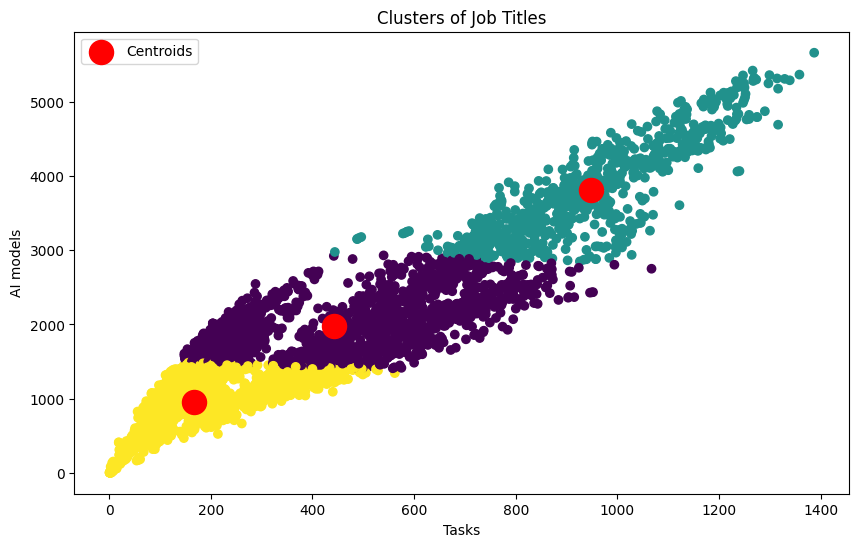

In [ ]:
# Apply k-means clustering with the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
optimal_clusters = 3  # Assuming 3 as the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Tasks'], X['AI models'], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids')
plt.xlabel('Tasks')
plt.ylabel('AI models')
plt.title('Clusters of Job Titles')
plt.legend()
plt.show()
